In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [10]:
data1 = pd.DataFrame(pd.read_json(r"E:\pythonProject_open\data\SIR_dataset_processed.json"))
category_replacement = {'HIGH':0.14950673891899402, 'MEDIUM':0.37487842156454076, 'CRITICAL':0.2908850910101431, 'LOW':0.18472974850632207}
# data1['severity'] = data1['severity'].replace(category_replacement)

In [11]:
CVE_ID = data1["CVE_ID"]
data1.head(10)

CVE_ID                                      Issue_Url_old  \
0  CVE-2011-4116  https://github.com/Perl-Toolchain-Gang/File-Te...   
1  CVE-2013-4891  https://github.com/bcit-ci/CodeIgniter/issues/...   
2  CVE-2013-7447      https://github.com/mate-desktop/eom/issues/93   
3  CVE-2013-7458       https://github.com/antirez/redis/issues/3284   
4  CVE-2013-7458    https://github.com/antirez/linenoise/issues/121   
5  CVE-2013-7459       https://github.com/dlitz/pycrypto/issues/176   
6  CVE-2013-7489      https://github.com/bbangert/beaker/issues/191   
7  CVE-2014-0087   https://github.com/ManageIQ/manageiq/issues/1581   
8  CVE-2014-5002       https://github.com/panthomakos/lynx/issues/3   
9  CVE-2014-7919    https://github.com/alexpark07/Bookmark/issues/1   

                                       Issue_Url_new  \
0  https://github.com/perl-toolchain-gang/file-te...   
1  https://github.com/bcit-ci/codeigniter/issues/...   
2      https://github.com/mate-desktop/eom/issues/93   
3         https://github.com/redis/redis/issues/3284   
4    https://github.com/antirez/linenoise/issues/121   
5    https://github.com/pycrypto/pycrypto/issues/176   
6      https://github.com/bbangert/beaker/issues/191   
7   https://github.com/manageiq/manageiq/issues/1581   
8       https://github.com/panthomakos/lynx/issues/3   
9    https://github.com/alexpark07/bookmark/issues/1   

                        Repo_new          Issue_Created_At  \
0  perl-toolchain-gang/file-temp 2016-04-03 03:41:22+00:00   
1            bcit-ci/codeigniter 2015-08-04 08:48:37+00:00   
2               mate-desktop/eom 2015-07-26 22:46:13+00:00   
3                    redis/redis 2016-05-30 15:35:38+00:00   
4              antirez/linenoise 2016-06-18 01:24:57+00:00   
5              pycrypto/pycrypto 2015-12-14 23:33:48+00:00   
6                bbangert/beaker 2020-05-14 18:02:40+00:00   
7              manageiq/manageiq 2015-02-05 08:32:09+00:00   
8               panthomakos/lynx 2018-01-12 00:12:50+00:00   
9            alexpark07/bookmark 2016-07-12 17:28:56+00:00   

                                         description  \
0  APITAG allows unsafe traversal of symlinks API...   
1  APITAG security and CVE database. Hello APITAG...   
2  EOM crashes when trying to open a large PNG fi...   
3  redis cli: permissions when opening history fi...   
4  Function to save history as private file by de...   
5  AES.new with invalid parameter crashes python....   
6  Insecure data serialization method by default ...   
7  Hardening of the RBAC check. The current code ...   
8  CVE: APITAG password exposed on the command li...   
9  can you match up one of your disclosures?. FIL...   

                                   vectorString  severity  baseScore  \
0  CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:H/A:N      HIGH        7.5   
1  CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:C/C:L/I:L/A:N    MEDIUM        6.1   
2  CVSS:3.0/AV:N/AC:L/PR:N/UI:R/S:U/C:N/I:N/A:H    MEDIUM        6.5   
3  CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N       LOW        3.3   
4  CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:L/I:N/A:N       LOW        3.3   
5  CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H  CRITICAL        9.8   
6  CVSS:3.1/AV:A/AC:L/PR:H/UI:N/S:U/C:H/I:H/A:H    MEDIUM        6.8   
7  CVSS:3.0/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H      HIGH        8.8   
8  CVSS:3.0/AV:L/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H      HIGH        7.8   
9  CVSS:3.0/AV:N/AC:L/PR:N/UI:N/S:U/C:N/I:N/A:H      HIGH        7.5   

   impactScore  exploitabilityScore  
0          3.6                  3.9  
1          2.7                  2.8  
2          3.6                  2.8  
3          1.4                  1.8  
4          1.4                  1.8  
5          5.9                  3.9  
6          5.9                  0.9  
7          5.9                  2.8  
8          5.9                  1.8  
9          3.6                  3.9

In [12]:
# 去除无用数据列
data1 = data1.drop(["CVE_ID"],axis=1)
data1 = data1.drop(["Issue_Url_old"],axis=1)
data1 = data1.drop(["Issue_Url_new"],axis=1)
data1 = data1.drop(["Repo_new"],axis=1)
data1 = data1.drop(["Issue_Created_At"],axis=1)
data1 = data1.drop(["description"],axis=1)
data1 = data1.drop(["vectorString"],axis=1)
data1 = data1.drop(["severity"],axis=1)

In [13]:
# 复制元数据col
new_col = data1.columns

In [14]:
# PCA降维
pca=PCA(2)
pca.fit(data1)
new_data=pca.transform(data1)
new_data.shape

(7037, 2)

In [15]:
# 对数据进行预处理标准化
scaler=preprocessing.StandardScaler().fit(new_data)
data_s=pd.DataFrame(scaler.fit_transform(new_data,y=data1.columns))
data_s.head(10)

0         1
0  0.022365  1.330027
1 -0.863975  0.597988
2 -0.454437  0.162479
3 -2.372864 -0.154303
4 -2.372864 -0.154303
5  1.539811  0.528399
6  0.138943 -2.722275
7  1.063009 -0.639149
8  0.596053 -1.722707
9  0.022365  1.330027

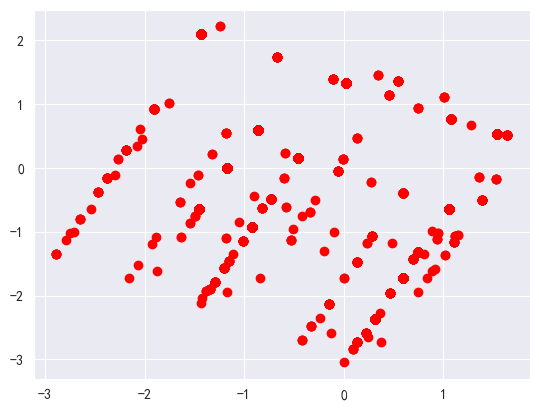

In [16]:
# 元数据散点图
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(data_s[0],data_s[1],c='r',label='散点')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

Text(0, 0.5, '$J(C_K)$')

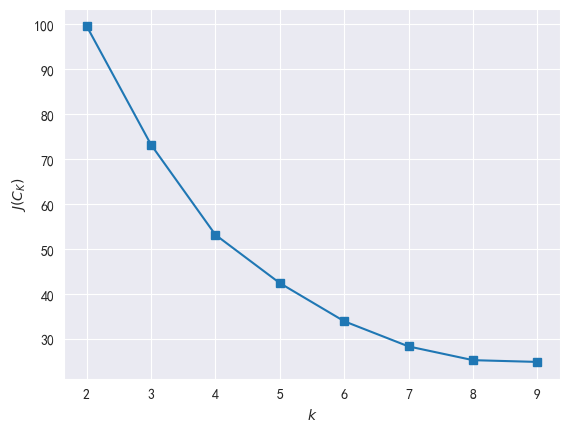

In [18]:
# 确定Kmeans K值
inertia=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_s)
    inertia.append(np.sqrt(kmeans.inertia_))
plt.plot(range(2,10),inertia,marker='s')
plt.xlabel('$k$') # K
plt.ylabel('$J(C_K)$') # 误差平方和

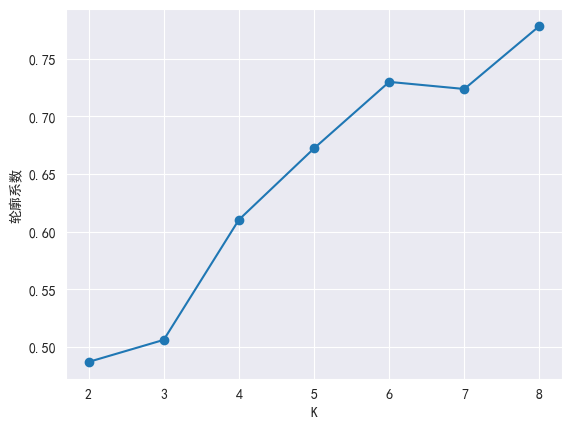

In [19]:
# 存放轮廓系数
Scores=[]
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2,9):
    estimator=KMeans(n_clusters=k) #构造聚类器
    estimator.fit(data_s)
    Scores.append(silhouette_score(data_s,estimator.labels_,metric='euclidean'))
X=range(2,9)
plt.xlabel('K')
plt.ylabel('轮廓系数')
plt.plot(X,Scores,'o-')
plt.show()

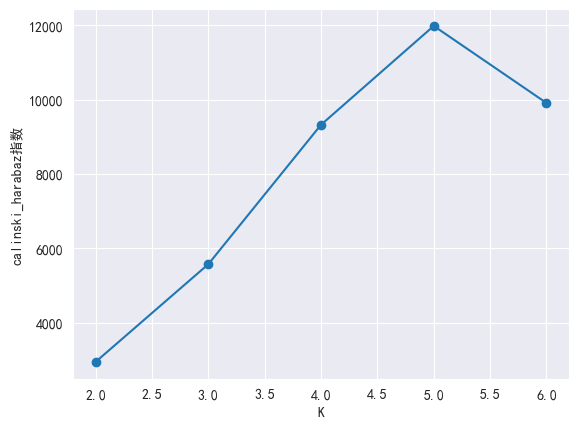

In [20]:
# calinski_haarbaz指数
from sklearn.metrics import calinski_harabasz_score
haraba=[]
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2,7):
    estimator=KMeans(n_clusters=k) #构造聚类器
    estimator.fit(data_s)
    haraba.append(calinski_harabasz_score(data_s,estimator.labels_))
X=range(2,7)
plt.xlabel('K')
plt.ylabel('calinski_harabaz指数')
plt.plot(X,haraba,'o-')
plt.show()

In [21]:
#建立模型
cluster=KMeans(n_clusters=4,random_state=5).fit(data_s)

In [22]:
#聚类中心
centers=cluster.cluster_centers_ #聚类中心
centers

array([[ 1.50178258,  0.54620602],
       [-0.89033613, -0.13211205],
       [ 0.76298415, -1.22748447],
       [-0.14630959,  1.42249832]])

In [23]:
# 查看总距离平方和
inertia = cluster.inertia_
inertia

2901.1907934178525

In [24]:
# 轮廓系数均值
c_preds1 = cluster.labels_
silhouette_score(data_s,c_preds1)

0.6103293846770578

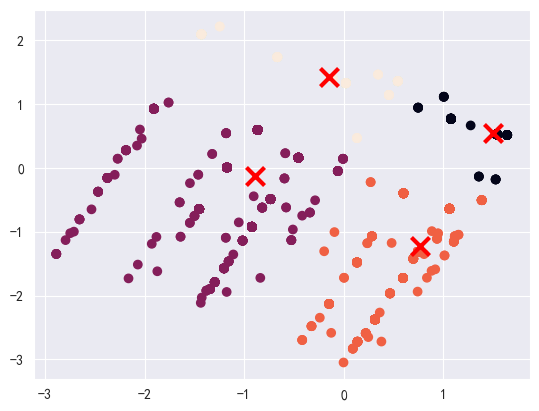

In [25]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(data_s.values[:, 0], data_s.values[:, 1], c=c_preds1)#原始数据散点图，按照分类查看
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=10) # 重心红色X进行突出

In [26]:
clust_prod = data1.copy()
clust_prod['标签'] = c_preds1
clust_prod.insert(loc=0,column="CVE_ID",value=CVE_ID)
clust_prod.head(10)
clust_prod.to_csv("PCA+KMeans聚类.csv")

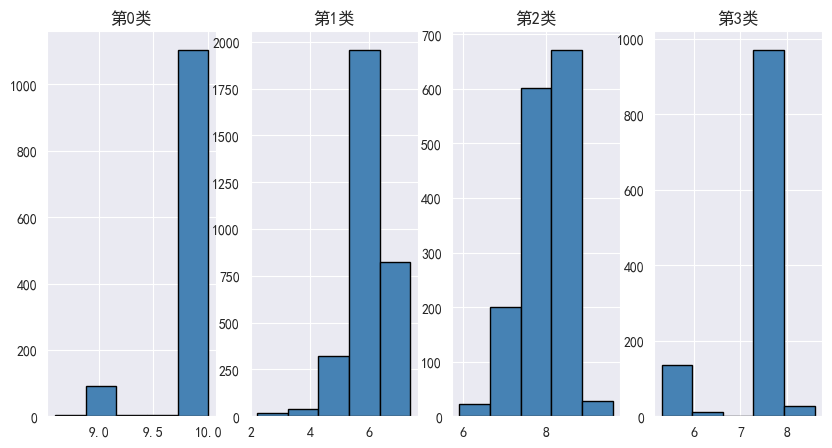

In [27]:
# 绘制子图
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(x = clust_prod[clust_prod.标签==i].baseScore, # 指定绘图数据
             bins = 5, # 指定直方图中条块的个数
             color = 'steelblue', # 指定直方图的填充色
             edgecolor = 'black' # 指定直方图的边框色
            )
    plt.title('第'+str(i)+'类')
plt.show()

In [28]:
# 层次聚类
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
res = clustering.fit(data_s)

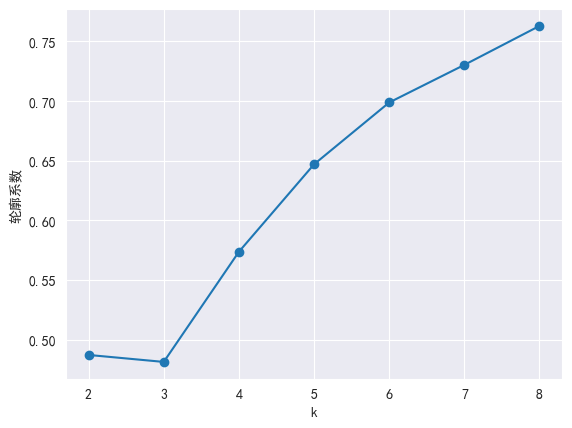

In [29]:
# 存放轮廓系数
Scores = []
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
for k in range(2, 9):
    estimator = AgglomerativeClustering(n_clusters=k)  # 构造聚类器
    estimator.fit(data_s)
    Scores.append(silhouette_score(data_s, estimator.labels_, metric='euclidean'))
X = range(2, 9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X, Scores, 'o-')
plt.show()

<Axes: >

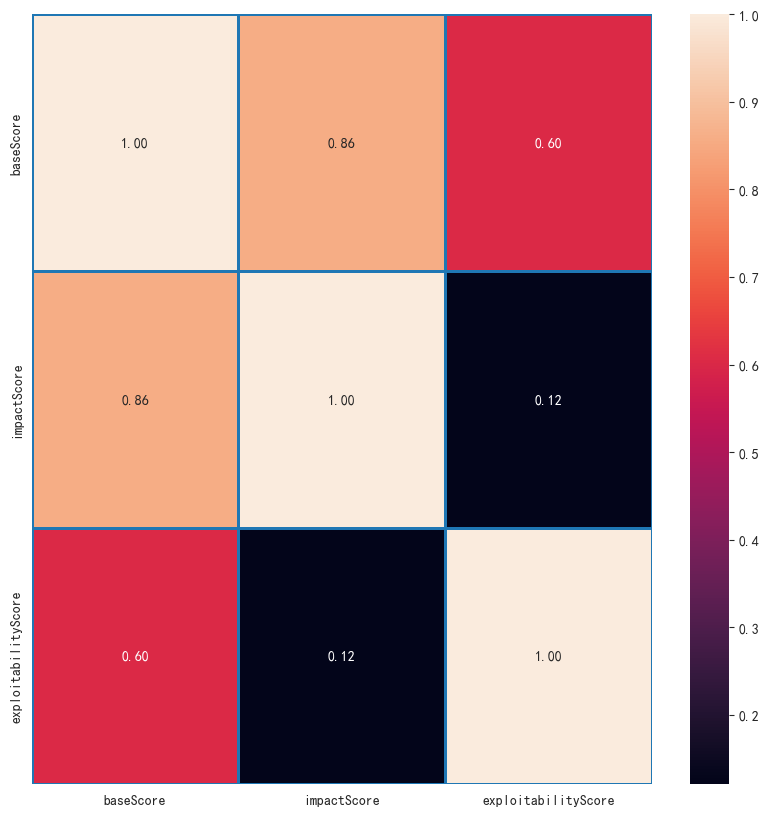

In [30]:
# 热力图-相关性分析
import seaborn as sns
plt.figure(figsize=(10,10))
colnm=data1.columns.tolist()[:6]
color = sns.color_palette()
sns.heatmap(data1[colnm].corr(),linecolor=color[0],linewidths=1.0,annot=True,fmt='0.2f')